# Implementação dos grafos

In [63]:
import heapq
from math import ceil,floor
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [64]:
def fill_line(matriz: np.array,
              line: list,
              color: int = 100
              ):

    for x, y in line:
        matriz[x][y] = color

    return matriz

In [65]:
def calculate_line(Point_p1: tuple,
                   Point_p2: tuple,
                   matriz: np.array = None,
                   list_segment: list = None,
                   draw: bool = True
                   ):

    """
        Calculela line is valid

    args:
        point_p1 : coordinates of the point 1
        point_p2 : coordinates of the point 2

    Returns:
        _type_: list
    """

    line = []
    x1 , y1 = Point_p1
    x2, y2 = Point_p2

    step = max(abs(y2-y1), abs(x2-x1) )
    line = [(x1,y1), (x2,y2)]

    xinc = (x2 - x1)/step
    yinc = (y2 - y1)/step
    x = x1
    y = y1
    while(x < x2 -1 or y < y2 - 1):
        if not draw and len(line) > 2:
            if (aux_x, aux_y) in list_segment:
                #aux_x, aux_y, x1,y1,x2,y2)
                line = []
                break

        x = x + xinc
        y = y + yinc
        aux_x = floor(x)
        aux_y = floor(y)

        line.append((aux_x, aux_y))

    if draw:
        fill_line(matriz,line)

    return  line

In [66]:
def star_schema(point_target, matriz, obs, list_segments):

    points_possibles = {}

    for edges in obs:
        index_p = -1
        if (point_target in edges):
            index_p = edges.index(point_target)

        for ind  in range(len(edges)):

            if index_p > -1:
                if (index_p == ind or ind == index_p -2 or ind == index_p + 2):
                    continue


            if (line_point :=  calculate_line(point_target, edges[ind], matriz,list_segments, False)):
                fill_line(matriz, line_point, 255)
                points_possibles[edges[ind]] = line_point



    return points_possibles


In [67]:
def get_edge_segments(matriz, edge:list[list], list_segment: list, dict_segments: dict):

    p1 = ( calculate_line(edge[0], edge[1], matriz))
    p2 = (calculate_line(edge[1], edge[2], matriz))
    p3 = (calculate_line(edge[3], edge[2], matriz))
    p4 = (calculate_line(edge[0], edge[3], matriz))
    dict_segments[edge[0]] = {edge[1]: p1, edge[2]: p4}
    dict_segments[edge[1]] = {edge[2]: p2}
    dict_segments[edge[2]] = {edge[2]: p3}
    
    list_segment.extend(p1 + p2 + p3 + p4)

    return list_segment

In [68]:
def calculate__route(matriz: np.array,
                     point_initial: tuple,
                     point_final: tuple,
                     obs: list[list],
                     list_segments: list,
                     dict_segments: list
                     ):

    points_possibles = {}
    line = []

    if line := calculate_line(point_initial, point_final , matriz, list_segments, False):
        fill_line(matriz,line,255)
    else:
        obs.append([point_final])
        points_possibles = {point_initial : star_schema(point_initial, matriz, obs, list_segments)}
        keys_possibels = set(points_possibles[point_initial].keys())
        aux_keys = []
        while( keys_possibels != set() ):

            for point in keys_possibels:

                points_possibles[point] = star_schema(point, matriz, obs, list_segments)
                
                if(point in dict_segments.keys()):
                    points_possibles[point].update(dict_segments[point])
                aux_keys.extend( list(points_possibles[point].keys()))
                    


            aux_keys = set(aux_keys)
            keys_possibels = aux_keys.difference(set(points_possibles.keys()))
            aux_keys = []


    return points_possibles

In [69]:
def create_matriz(
        tamanho: int = 100,
        tam_obs: int = 20,
        qtd_obs: int = 50,
        point_init: tuple= None,
        point_final: tuple= None
):

    # Cria a matriz usando numpy_min
    matriz = np.zeros((tamanho, tamanho,3), dtype=int)

    fill_line(matriz,[point_init, point_final],100)

    # lista de obstaculos
    obstaculos = []

    x_valid = tamanho - tam_obs - 1
    y_valid = tamanho - tam_obs - 1
    # loop de gerar obstaculos
    num_obstaculos = 0
    list_segments = []
    dict_segments = {}
    while num_obstaculos < qtd_obs:

        # Gere coordenadas aleatórias do canto superior esquerdo dentro do intervalo válido

        x_min = random.randint(0, x_valid)
        y_min = random.randint(0, y_valid)
        x_max = x_min + tam_obs
        y_max = y_min + tam_obs

        # Varifica se a sobreposção
        if matriz[x_min:x_max , y_min:y_max ].sum() > 0:
            continue

        # Desenhe obstáculo na matriz usando fatiamento
        #matriz[x_min:x_max , y_min:y_max ] = 1

        num_obstaculos += 1

        # Crie um obstáculo como uma tupla de cantos superiores esquerdo e inferior direito
        obstaculo = [(x_min,y_min),(x_min,y_max), (x_max, y_max), (x_max, y_min)]

        # Adicione coordenadas de obstáculos à lista

        obstaculos.append(obstaculo)

        get_edge_segments(matriz,obstaculo, list_segments, dict_segments)

    return matriz, list_segments, obstaculos, dict_segments

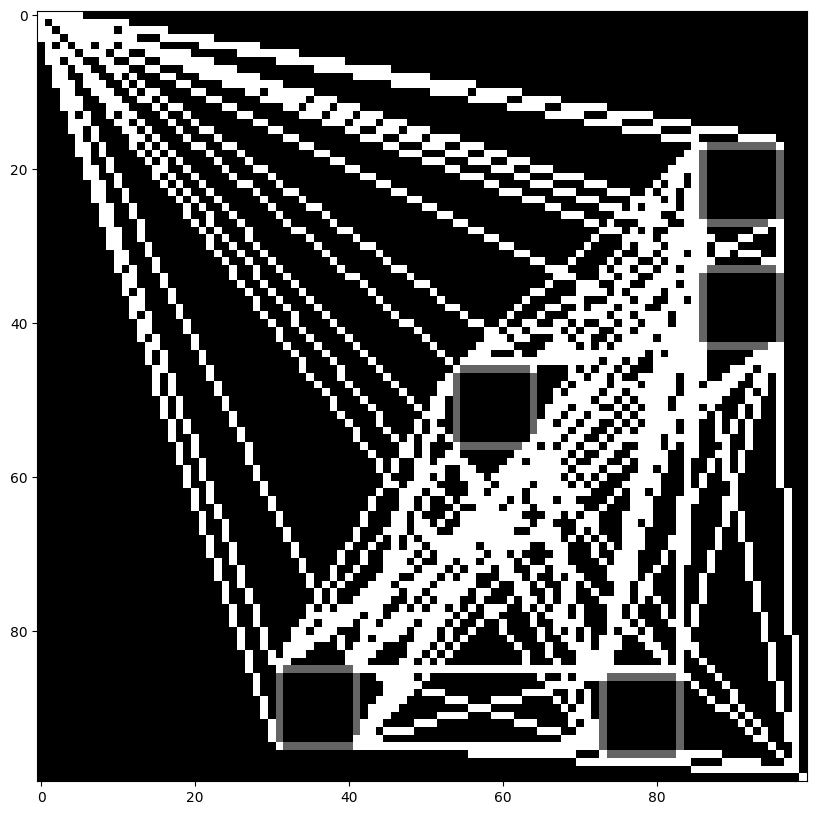

In [70]:
def main():

  # Define o tamanho da matriz
  tamanho = 100

  # Define o tamanho dos obstaculos
  tamanho_obstaculo =10

  point_1 = (0,0)
  point_2 = (99,99)

  matriz, list_segments , obs, dict_segments= create_matriz(tamanho, tamanho_obstaculo, 5, point_1, point_2)



  points = calculate__route(matriz, point_1, point_2, obs, list_segments, dict_segments)

  # plota a matiz
  plt.figure(figsize=(10,10))
  plt.imshow(matriz)
  plt.show()

main()

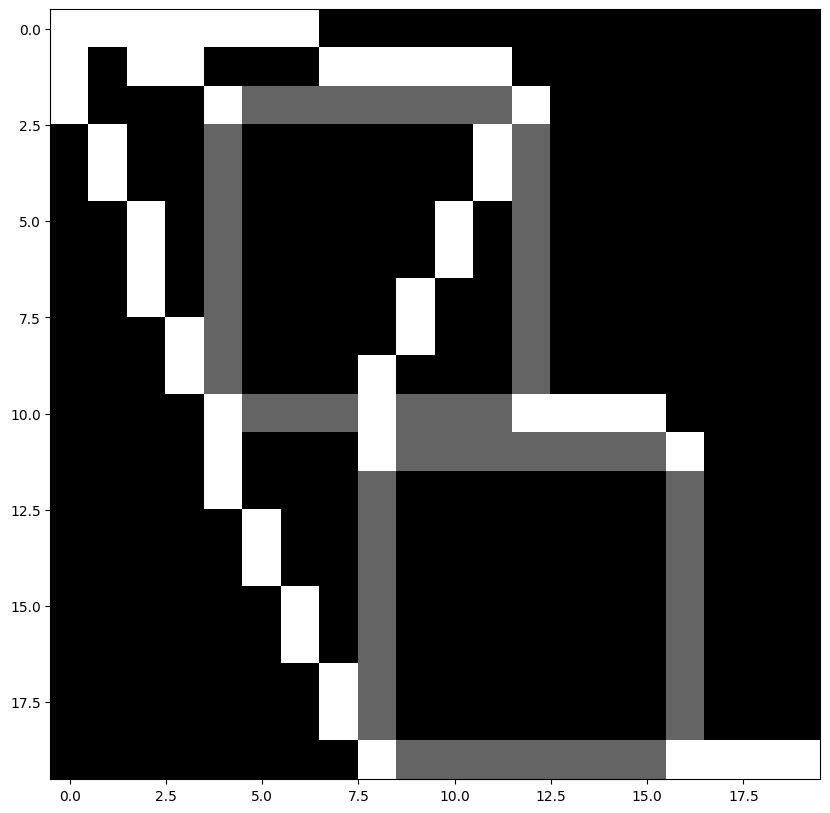

In [71]:
# Define o tamanho da matriz
tamanho = 20

# Define o tamanho dos obstaculos
tamanho_obstaculo = 8

point_1 = (0,0)
point_2 = (19,19)

matriz, list_segments , obs, dict_segments = create_matriz(tamanho, tamanho_obstaculo, 2, point_1, point_2)



points = calculate__route(matriz, point_1, point_2, obs, list_segments, dict_segments)


# plota a matiz
plt.figure(figsize=(10,10))
plt.imshow(matriz)
plt.show()

In [72]:
points.keys()

dict_keys([(0, 0), (10, 4), (2, 4), (2, 12), (19, 8), (11, 8), (10, 12), (19, 16), (11, 16), (19, 19)])

In [73]:
list_values = points.values()
edgs = [x.keys() for x in list_values]

In [74]:
edgs

[dict_keys([(2, 4), (2, 12), (10, 4)]),
 dict_keys([(2, 4), (19, 8)]),
 dict_keys([(2, 12), (10, 12)]),
 dict_keys([(2, 4), (11, 8), (10, 12)]),
 dict_keys([(2, 4), (10, 4), (11, 8)]),
 dict_keys([(2, 4), (10, 4), (11, 16), (19, 16)]),
 dict_keys([(2, 12), (10, 4), (11, 8), (11, 16), (10, 12)]),
 dict_keys([(2, 4), (2, 12), (10, 12), (10, 4), (11, 16), (19, 8), (19, 19), (19, 16)]),
 dict_keys([(2, 4), (2, 12), (10, 12), (10, 4), (11, 8), (19, 16)]),
 dict_keys([(2, 4), (2, 12), (10, 12), (10, 4), (11, 8), (11, 16), (19, 16), (19, 8)])]

In [75]:
def criar_novo_dicionario(dicionario_original):
    novo_dicionario = {}

    for chave_externa in dicionario_original:
        chaves_internas = []

        for chave_interna in dicionario_original[chave_externa]:
            chaves_internas.append(chave_interna)

        novo_dicionario[chave_externa] = chaves_internas

    return novo_dicionario


## Dicionarios de vertices e arestas

In [76]:
novo_dicionario = criar_novo_dicionario(points)

In [77]:
#novo_dicionario.pop((99,99))

In [78]:
novo_dicionario

{(0, 0): [(2, 4), (2, 12), (10, 4)],
 (10, 4): [(2, 4), (19, 8)],
 (2, 4): [(2, 12), (10, 12)],
 (2, 12): [(2, 4), (11, 8), (10, 12)],
 (19, 8): [(2, 4), (10, 4), (11, 8)],
 (11, 8): [(2, 4), (10, 4), (11, 16), (19, 16)],
 (10, 12): [(2, 12), (10, 4), (11, 8), (11, 16), (10, 12)],
 (19, 16): [(2, 4),
  (2, 12),
  (10, 12),
  (10, 4),
  (11, 16),
  (19, 8),
  (19, 19),
  (19, 16)],
 (11, 16): [(2, 4), (2, 12), (10, 12), (10, 4), (11, 8), (19, 16)],
 (19, 19): [(2, 4),
  (2, 12),
  (10, 12),
  (10, 4),
  (11, 8),
  (11, 16),
  (19, 16),
  (19, 8)]}

In [79]:
for chave_externa in novo_dicionario:
  print(chave_externa)

(0, 0)
(10, 4)
(2, 4)
(2, 12)
(19, 8)
(11, 8)
(10, 12)
(19, 16)
(11, 16)
(19, 19)


In [80]:
nodes = []
for node in novo_dicionario:
  nodes.append(node)
print(nodes)

[(0, 0), (10, 4), (2, 4), (2, 12), (19, 8), (11, 8), (10, 12), (19, 16), (11, 16), (19, 19)]


In [81]:
for node in nodes:
  print("\n")
  for list_p in novo_dicionario[node]:
    print(node, "->", list_p)



(0, 0) -> (2, 4)
(0, 0) -> (2, 12)
(0, 0) -> (10, 4)


(10, 4) -> (2, 4)
(10, 4) -> (19, 8)


(2, 4) -> (2, 12)
(2, 4) -> (10, 12)


(2, 12) -> (2, 4)
(2, 12) -> (11, 8)
(2, 12) -> (10, 12)


(19, 8) -> (2, 4)
(19, 8) -> (10, 4)
(19, 8) -> (11, 8)


(11, 8) -> (2, 4)
(11, 8) -> (10, 4)
(11, 8) -> (11, 16)
(11, 8) -> (19, 16)


(10, 12) -> (2, 12)
(10, 12) -> (10, 4)
(10, 12) -> (11, 8)
(10, 12) -> (11, 16)
(10, 12) -> (10, 12)


(19, 16) -> (2, 4)
(19, 16) -> (2, 12)
(19, 16) -> (10, 12)
(19, 16) -> (10, 4)
(19, 16) -> (11, 16)
(19, 16) -> (19, 8)
(19, 16) -> (19, 19)
(19, 16) -> (19, 16)


(11, 16) -> (2, 4)
(11, 16) -> (2, 12)
(11, 16) -> (10, 12)
(11, 16) -> (10, 4)
(11, 16) -> (11, 8)
(11, 16) -> (19, 16)


(19, 19) -> (2, 4)
(19, 19) -> (2, 12)
(19, 19) -> (10, 12)
(19, 19) -> (10, 4)
(19, 19) -> (11, 8)
(19, 19) -> (11, 16)
(19, 19) -> (19, 16)
(19, 19) -> (19, 8)


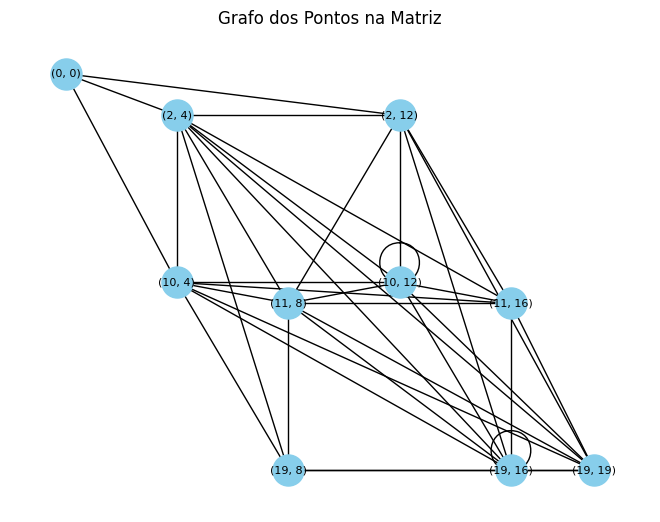

In [82]:

def criar_grafo(dicionario_original):
    G = nx.Graph()

    # Adicionando nós ao grafo
    for chave_externa in dicionario_original:
        G.add_node(chave_externa)

        for chave_interna in dicionario_original[chave_externa]:
          #print(chave_externa, "->", chave_interna)
          G.add_node(chave_interna)
          G.add_edge(chave_externa, chave_interna)


    return G

def desenhar_grafo_como_matriz(G):
    # Mapeamento de posição dos nós
    pos = {}
    for node in G.nodes():
        pos[node] = (node[1], -node[0])  # Invertendo a coordenada y para coincidir com a orientação da matriz

    # Desenhando o grafo
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)
    plt.title('Grafo dos Pontos na Matriz')
    plt.show()

# Teste da função
G = criar_grafo(novo_dicionario)

desenhar_grafo_como_matriz(G)
